# Exploratory Data Analysis

## Analzying Chicago Crime and Property Datasets

### Data Acquisition

Our analysis draws upon two primary datasets:

- **Crime data**: Sourced from Chicago Data Portal and maintained by Chicago Police Department. Contains reported incidents of crime (excluding murders) that occured in Chicago. Each row represents a single reported crime incident. (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

- **Property data**: colected from HomeHarvest real estate scraping library that extracts and formats data in the style of MLS listings. Fetches properties directly from Realtor.com and structures data to resemble MLS listings. Each row represents a single property listing. (https://github.com/Bunsly/HomeHarvest)teristics,

### Data Preprocessing:

- **Outlier Removal**: We implemented outlier detection techniques to identify and remove extreme values that could skew our analysis. Specifically, we removed sold prices above the 99th percentile (exceeding $3.5 million) to focus on properties within a reasonable price range.

- **Data Sanity Checks**: We performed sanity checks on the property datasets, removing rows where the number of beds or full baths exceeded 10, as such values were considered outliers. 

- **Missing Value Imputation**: To address missing values in the 'beds' and 'full_baths' columns, we applied regression imputation techniques to estimate and fill in the missing values.

- **Data Filtering**: In the crime dataset, we refined our data selection to focus on incidents with significant preceived implications on property prices. Specificallly, we filtered the dataset to retain only rows where incidents led to an arrest and crimes that were property, violent, and drug-related.

### Objective:

The primary objective of this project is to conductnve analysis of the datasets pertaining to crime and property in Chicago. By applying various statistical and visual exploration techniques, we seek to gain a deeper understanding of the following:

1.  Crime Trends: We aim to identify temporal and spatial patterns in crime occurrences, including hotspots, prevalent crime types, and any notable fluctuations over time.
2.  Property Data Insights: Exploring property-related datasets can provide valuable insights into real estate trends, neighborhood characteristics.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)

In [27]:
crime_df = pd.read_csv("C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/clean_crime_2.csv")
property_df = pd.read_csv("C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/clean_property.csv")
merged_df = pd.read_csv("C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/merged_df_2.csv")


In [3]:
crime_df.dtypes

date                     object
latitude                float64
description              object
location_description     object
year                      int64
domestic                   bool
fbi_code                 object
longitude               float64
primary_type             object
arrest                     bool
geometry                 object
community                object
shape_area              float64
Neighborhood             object
crime_category           object
incident_count_x          int64
TOT_POP                 float64
MEDINC                  float64
TOT_EMP_RES             float64
Crime_Rate_per_1000     float64
incident_count_y          int64
total_crimes              int64
proportion              float64
Income_Per_Capita       float64
Employment_Rate         float64
shape_area_sq_miles     float64
Month                     int64
Day_of_Week              object
Season                   object
dtype: object

In [4]:
property_df.dtypes

property_url        object
style               object
beds               float64
full_baths         float64
half_baths         float64
sqft               float64
year_built         float64
sold_price         float64
last_sold_date      object
latitude           float64
longitude          float64
sqft_mean          float64
sqft_median        float64
sqft_regression    float64
geometry            object
community           object
shape_area         float64
Neighborhood        object
year                 int64
dtype: object

# Time Period

## Crime

In [5]:
crime_df['date'] = pd.to_datetime(crime_df['date'])

min_date = crime_df['date'].min()
max_date = crime_df['date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2015-01-01 00:00:00
Maximum Date: 2023-12-31 23:51:00


## Property

In [6]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'])

min_date = property_df['last_sold_date'].min()
max_date = property_df['last_sold_date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2014-02-05 00:00:00
Maximum Date: 2023-12-14 00:00:00


# Key Variables

## Crime

- `date`: date and time the incident occurred 
- `description`: provides a description of the incident or crime that occurred
- `location_description`: describes the location where the incident occurred 
- `community`: community area where the incident occurred
- `neighborhood`: region where the incident occurred
- `crime_category`: categorizes the primary_type to three classes; violent, property, drug-related crimes
- `Employment_Rate`: employment rate within the community for that year
- `Income_Per_Capita`: average income per person within community for that year
- `TOT_EMP_RES`: total number of employed residents within the community for that year
- `CRIME_Rate_per_1000`: crime rate per 1000 people within the community for that year
- `Season`: categorizes incidents based on the season in which they occurred

## Property

- `style`: fepresents the architectural style or type of property
- `beds`: denotes the number of bedrooms in the property.
- `full_baths`: specifies the number of full bathrooms in the property.
- `sold_price`: represents the price at which the property was sold. 
- `last_sold_date`: indicates the date when the property was last sold.
- `community`: identifies the community or neighborhood in which the property is located.
- `Neighborhood`: specifies the broader region in which the property is situated.

## Crime Analysis

In [7]:
crime_df.head(2)

,date,latitude,description,location_description,year,domestic,fbi_code,longitude,primary_type,arrest,geometry,community,shape_area,Neighborhood,crime_category,incident_count_x,TOT_POP,MEDINC,TOT_EMP_RES,Crime_Rate_per_1000,incident_count_y,total_crimes,proportion,Income_Per_Capita,Employment_Rate,shape_area_sq_miles,Month,Day_of_Week,Season
0,2023-12-31 20:02:00,41.891926,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,SIDEWALK,2023,False,18,-87.628074,NARCOTICS,True,POINT (-87.628074136 41.891926214),NEAR NORTH SIDE,7.667590e+07,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0,1.77656,175,1065,0.164319,1165.323007,0.529131,2.750369,12,Sunday,Winter
1,2023-12-29 02:57:00,41.896823,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,2023,False,18,-87.638683,NARCOTICS,True,POINT (-87.638683107 41.89682348),NEAR NORTH SIDE,7.667590e+07,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0,1.77656,175,1065,0.164319,1165.323007,0.529131,2.750369,12,Friday,Winter


#### Top and Bottom 5 communities by crime

In [11]:
# calculate mean crime rate per 1,000 population for each community
average_crime_rates = crime_df.groupby('community')['Crime_Rate_per_1000'].mean().reset_index()

# sort and select the communities with the five highest and five lowest crime rates
top_5_communities = average_crime_rates.nlargest(5, 'Crime_Rate_per_1000')
bottom_5_communities = average_crime_rates.nsmallest(5, 'Crime_Rate_per_1000')

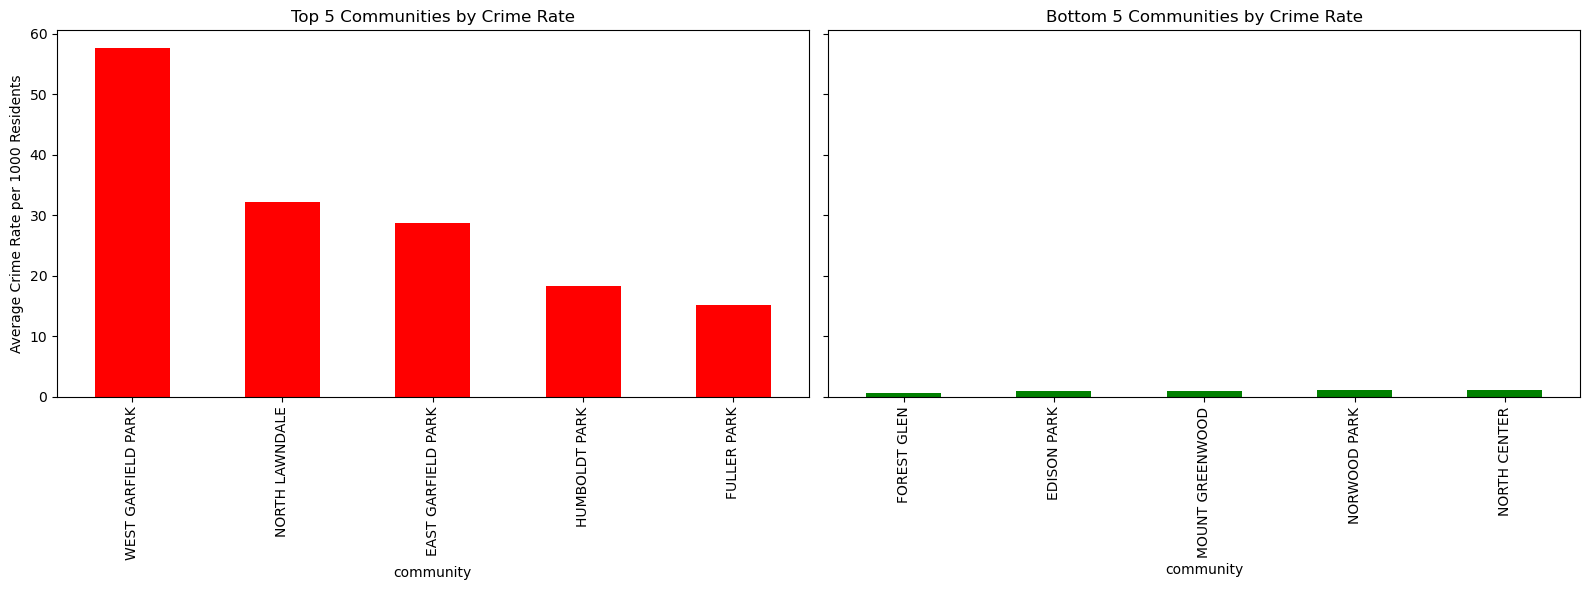

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

top_5_communities.plot(x='community', y='Crime_Rate_per_1000', kind='bar', ax=ax[0], legend=False, color='red')
ax[0].set_title('Top 5 Communities by Crime Rate')
ax[0].set_ylabel('Average Crime Rate per 1000 Residents')

bottom_5_communities.plot(x='community', y='Crime_Rate_per_1000', kind='bar', ax=ax[1], legend=False, color='green')
ax[1].set_title('Bottom 5 Communities by Crime Rate')
ax[1].set_ylabel('Average Crime Rate per 1000 Residents')

plt.tight_layout()
plt.savefig('sample_plot2.png')

plt.show()


- West Garfield Park stands out with a particulalry high crime rate, more than double that of North Lawndale, the community with the second-highest rate.
- There is a stark contract between the communities with the highest and lowest crime rates. The bottom five communities have such low crime rates that their bars are barely visible on the same scale as the top five, indicating a significant disparity in crime rates across different communities. 

### Median home sold price of Top and Bottom 5 communities by crime

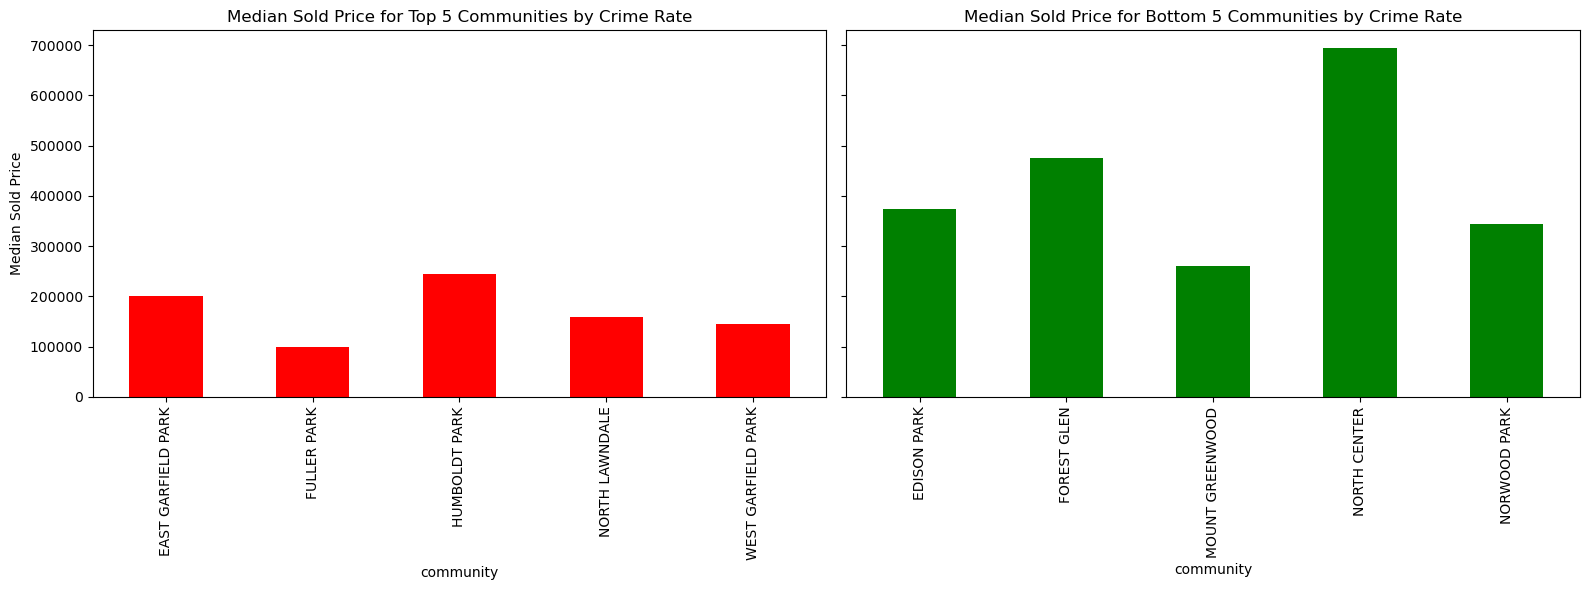

In [26]:
# calculate mean crime rate per 1,000 population for each community
average_crime_rates = crime_df.groupby('community')['Crime_Rate_per_1000'].mean().reset_index()

# sort and select the communities with the five highest and five lowest crime rates
top_5_communities = average_crime_rates.nlargest(5, 'Crime_Rate_per_1000')
bottom_5_communities = average_crime_rates.nsmallest(5, 'Crime_Rate_per_1000')

top_5_merged = pd.merge(top_5_communities, property_df, on='community')
bottom_5_merged = pd.merge(bottom_5_communities, property_df, on='community')

# calculate median sold price for top 5 and bottom 5 communities
top_5_median_sold_price = top_5_merged.groupby('community')['sold_price'].median().reset_index()
bottom_5_median_sold_price = bottom_5_merged.groupby('community')['sold_price'].median().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

top_5_median_sold_price.plot(x='community', y='sold_price', kind='bar', ax=ax[0], legend=False, color='red')
ax[0].set_title('Median Sold Price for Top 5 Communities by Crime Rate')
ax[0].set_ylabel('Median Sold Price')

bottom_5_median_sold_price.plot(x='community', y='sold_price', kind='bar', ax=ax[1], legend=False, color='green')
ax[1].set_title('Median Sold Price for Bottom 5 Communities by Crime Rate')
ax[1].set_ylabel('Median Sold Price')

plt.tight_layout()
plt.show()


- There appears to be an inverse relationship between crime rates and property values in Chicago communities. Areas with higher crime rates tend to have lower median sold prices, while areas with lower crime rates have higher median sold prices.
- **North Center** stands out as a low-crime, high-value community, which could be a model for other neighborhoods aiming to improve both safety and property market conditions.

In [12]:
crime_pivot = crime_df.pivot_table(values='Crime_Rate_per_1000', index='community', columns='year', aggfunc='mean')

# calculate the percentage change from the first to the last column
crime_percentage_change = crime_pivot.pct_change(axis='columns').iloc[:, -1] * 100

crime_percentage_change = crime_percentage_change.reset_index()
crime_percentage_change.columns = ['community', 'Percentage_Change']

# sort to find the top 5 increases and decreases in crime rates
top_5_increase = crime_percentage_change.nlargest(5, 'Percentage_Change')
top_5_decrease = crime_percentage_change.nsmallest(5, 'Percentage_Change')


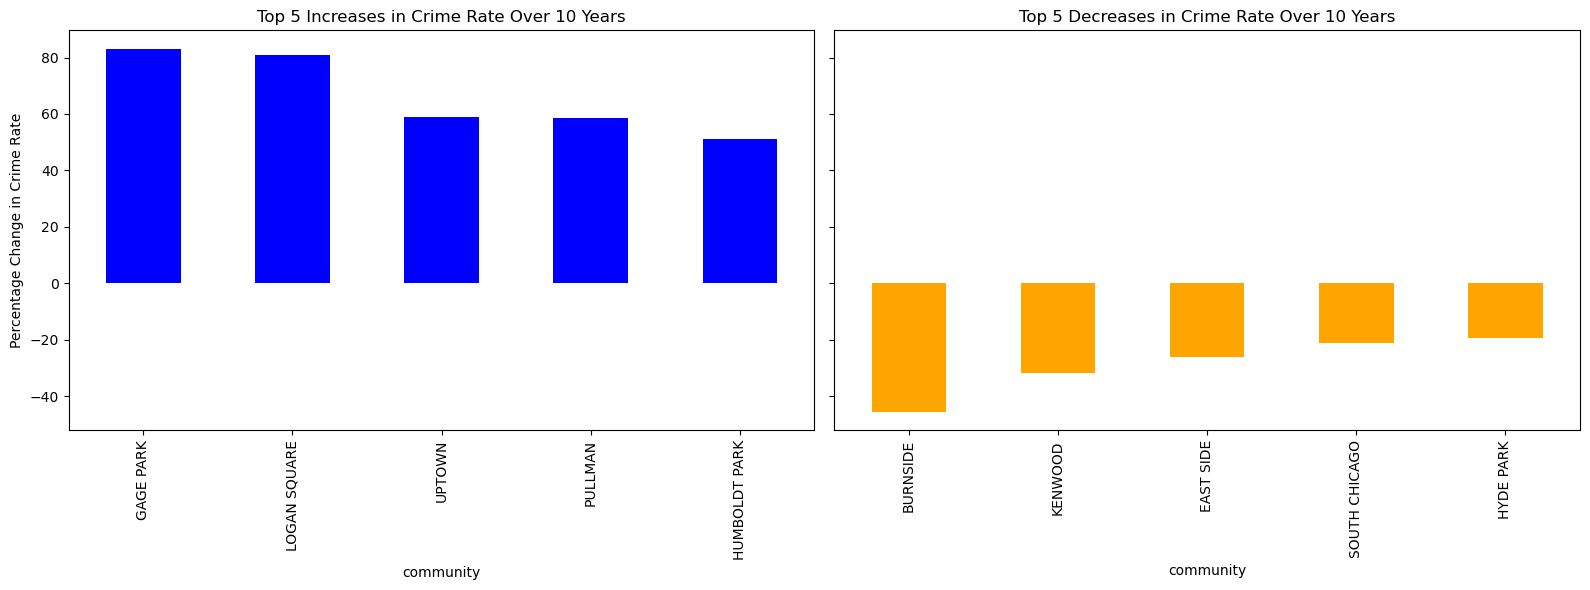

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

top_5_increase.plot(x='community', y='Percentage_Change', kind='bar', ax=ax[0], legend=False, color='blue')
ax[0].set_title('Top 5 Increases in Crime Rate Over 10 Years')
ax[0].set_ylabel('Percentage Change in Crime Rate')

top_5_decrease.plot(x='community', y='Percentage_Change', kind='bar', ax=ax[1], legend=False, color='orange')
ax[1].set_title('Top 5 Decreases in Crime Rate Over 10 Years')
ax[1].set_ylabel('Percentage Change in Crime Rate')

plt.tight_layout()
plt.savefig('sample_plot2.png')

plt.show()


While some communities have become safer, others have seen rising crime rates. Understanding the factors contributing to these changes could provide valuable insights for policy-making and community safety initiatives.

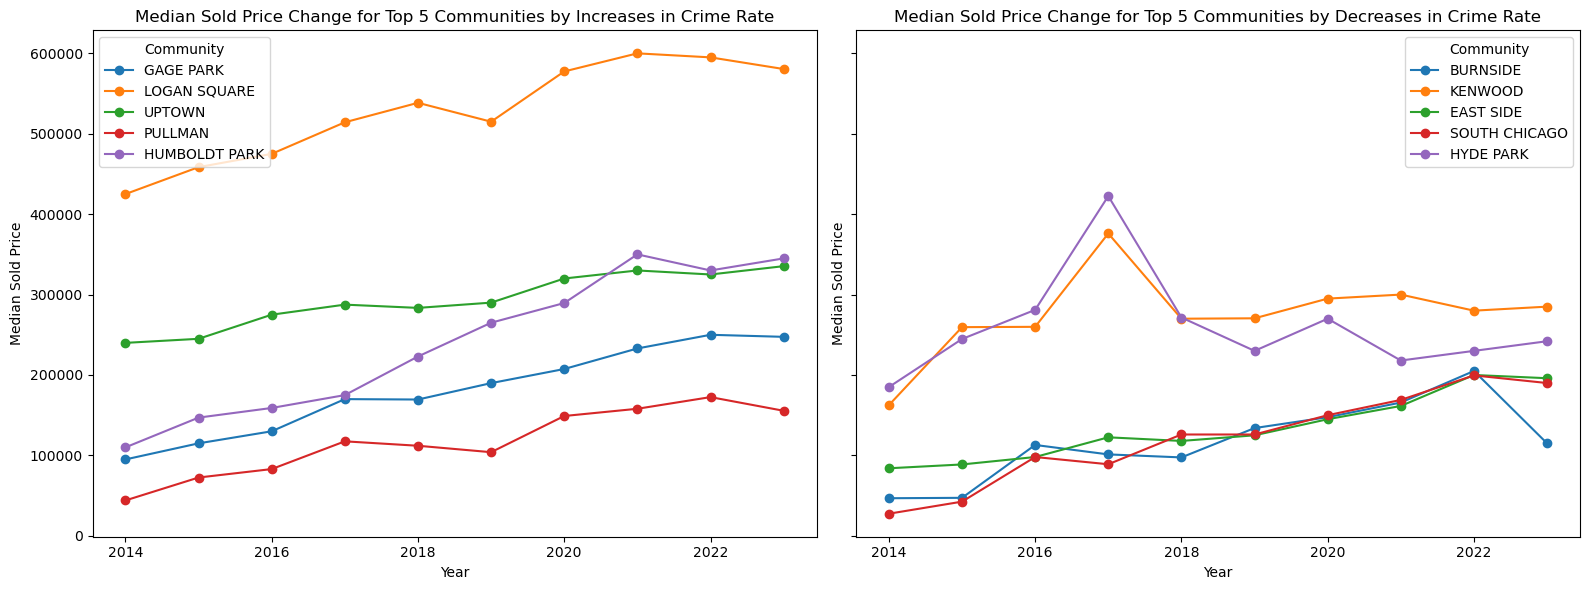

In [32]:
# calculate the pivot table and percentage change
crime_pivot = crime_df.pivot_table(values='Crime_Rate_per_1000', index='community', columns='year', aggfunc='mean')

# calculate the percentage change from the first to the last column
crime_percentage_change = crime_pivot.pct_change(axis='columns').iloc[:, -1] * 100
crime_percentage_change = crime_percentage_change.reset_index()
crime_percentage_change.columns = ['community', 'Percentage_Change']

# sort to find the top 5 increases and decreases in crime rates
top_5_increase = crime_percentage_change.nlargest(5, 'Percentage_Change')
top_5_decrease = crime_percentage_change.nsmallest(5, 'Percentage_Change')

# filter the property data for the last 10 years
recent_years = property_df[property_df['year'] >= property_df['year'].max() - 9]

# merge with recent_years to get median sold prices
top_5_increase_merged = pd.merge(top_5_increase, recent_years, on='community')
top_5_decrease_merged = pd.merge(top_5_decrease, recent_years, on='community')

# calculate median sold price for each year for top 5 increases and decreases in crime rates
top_5_increase_median_sold_price = top_5_increase_merged.groupby(['community', 'year'])['sold_price'].median().reset_index()
top_5_decrease_median_sold_price = top_5_decrease_merged.groupby(['community', 'year'])['sold_price'].median().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for community in top_5_increase['community']:
    community_data = top_5_increase_median_sold_price[top_5_increase_median_sold_price['community'] == community]
    ax[0].plot(community_data['year'], community_data['sold_price'], marker='o', label=community)
ax[0].set_title('Median Sold Price Change for Top 5 Communities by Increases in Crime Rate')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Median Sold Price')
ax[0].legend(title='Community')

for community in top_5_decrease['community']:
    community_data = top_5_decrease_median_sold_price[top_5_decrease_median_sold_price['community'] == community]
    ax[1].plot(community_data['year'], community_data['sold_price'], marker='o', label=community)
ax[1].set_title('Median Sold Price Change for Top 5 Communities by Decreases in Crime Rate')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Median Sold Price')
ax[1].legend(title='Community')

plt.tight_layout()
plt.savefig('sample_plot1.png')
plt.show()



-   Volatility in Prices: Some communities, like Hyde Park, exhibit significant volatility in property prices despite decreasing crime rates, indicating other factors influencing the real estate market.
-   Resilience in Property Values: Many communities demonstrate resilience in property values, with steady growth even in the face of rising crime rates, suggesting strong demand and other positive factors in these areas.

These findings highlight the complex relationship between crime rates and property values, suggesting that while crime rates are an important factor, other elements also play significant roles in determining property market trends.

### Identifying neighborhoods with unusually high crime rates in 2023.

Defining communities with high and low crime rates based on the current year's (2023) crime rate data. We define "high crime rate" communities as those with a crime rate per 1000 residents that exceeds the mean crime rate for the year plus one standard deviation.

In [16]:
crime_df_2023 = crime_df[crime_df['year'] == 2023]

# calculate the mean crime rate for each neighborhood in 2023
neighborhood_crime_rates_2023 = crime_df_2023.groupby('Neighborhood')['Crime_Rate_per_1000'].mean().reset_index()

# calculate the overall average crime rate and the standard deviation for 2023
overall_mean_2023 = neighborhood_crime_rates_2023['Crime_Rate_per_1000'].mean()
std_dev_2023 = neighborhood_crime_rates_2023['Crime_Rate_per_1000'].std()

# define 'unusually high' as more than one standard deviation above the mean
high_crime_neighborhoods_2023 = neighborhood_crime_rates_2023[
    neighborhood_crime_rates_2023['Crime_Rate_per_1000'] > overall_mean_2023 + std_dev_2023
]

print("Neighborhoods with unusually high crime rates in 2023:")
print(high_crime_neighborhoods_2023)

Neighborhoods with unusually high crime rates in 2023:
  Neighborhood  Crime_Rate_per_1000
8    West Side             8.746412


In [17]:
print("Communities with unusually high crime rates in 2023:")
print(high_crime_neighborhoods_2023[['community', 'Crime_Rate_per_1000']])

Communities with unusually high crime rates in 2023:
                 community  Crime_Rate_per_1000
19      EAST GARFIELD PARK             9.493451
23               ENGLEWOOD             7.740033
25             FULLER PARK             8.884139
29  GREATER GRAND CROSSING             6.714243
32           HUMBOLDT PARK            11.204577
51          NORTH LAWNDALE            11.685859
56                 PULLMAN             6.504799
68          WEST ENGLEWOOD             6.971913
69      WEST GARFIELD PARK            20.425283


### Heatmap for communities with high and low crime rates in 2023

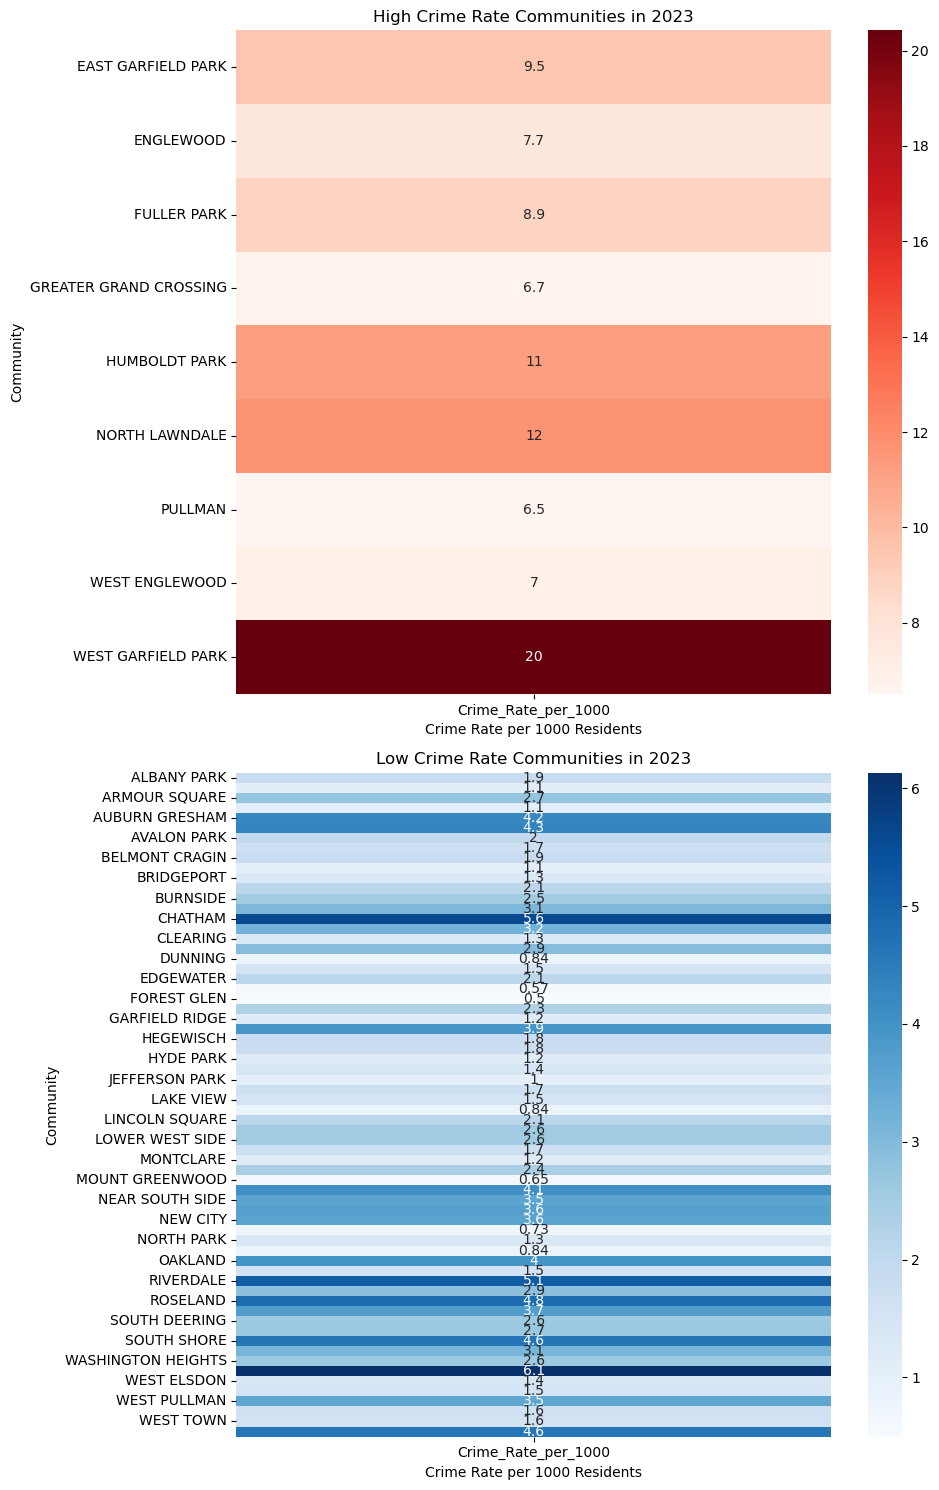

In [18]:
# define high and low crime rate thresholds
threshold = overall_mean_2023 + std_dev_2023

# create masks for high and low crime rates
high_crime_mask = neighborhood_crime_rates_2023['Crime_Rate_per_1000'] > threshold
low_crime_mask = neighborhood_crime_rates_2023['Crime_Rate_per_1000'] <= threshold

# filter data based on the defined masks
high_crime_data = neighborhood_crime_rates_2023[high_crime_mask]
low_crime_data = neighborhood_crime_rates_2023[low_crime_mask]

# set index to 'community' for plotting
high_crime_data.set_index('community', inplace=True)
low_crime_data.set_index('community', inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# heatmap for communities with high crime rates
sns.heatmap(high_crime_data[['Crime_Rate_per_1000']], ax=ax[0], annot=True, cmap="Reds", cbar=True)
ax[0].set_title('High Crime Rate Communities in 2023')
ax[0].set_xlabel('Crime Rate per 1000 Residents')
ax[0].set_ylabel('Community')

# heatmap for communities with low crime rates
sns.heatmap(low_crime_data[['Crime_Rate_per_1000']], ax=ax[1], annot=True, cmap="Blues", cbar=True)
ax[1].set_title('Low Crime Rate Communities in 2023')
ax[1].set_xlabel('Crime Rate per 1000 Residents')
ax[1].set_ylabel('Community')

plt.tight_layout()
plt.show()

### Year-over-year violent and Property crime rate changes for communities with high crime rates in 2023

In [19]:
violent_crimes = crime_df[crime_df['crime_category'] == 'Violent Crimes']
property_crimes = crime_df[crime_df['crime_category'] == 'Property Crimes']

violent_crime_counts = violent_crimes.groupby(['community', 'year']).incident_count_x.sum().unstack()
property_crime_counts = property_crimes.groupby(['community', 'year']).incident_count_x.sum().unstack()

percent_change_violent = violent_crime_counts.pct_change(axis=1) * 100
percent_change_property = property_crime_counts.pct_change(axis=1) * 100


C:\Users\Rashid\AppData\Local\Temp\ipykernel_25072\3789031697.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percent_change_property = property_crime_counts.pct_change(axis=1) * 100


In [20]:
high_crime_communities = high_crime_data.index.tolist()

# cilter these DataFrames to include only high crime rate communities
high_crime_violent_changes = percent_change_violent.loc[percent_change_violent.index.isin(high_crime_communities)]
high_crime_property_changes = percent_change_property.loc[percent_change_property.index.isin(high_crime_communities)]

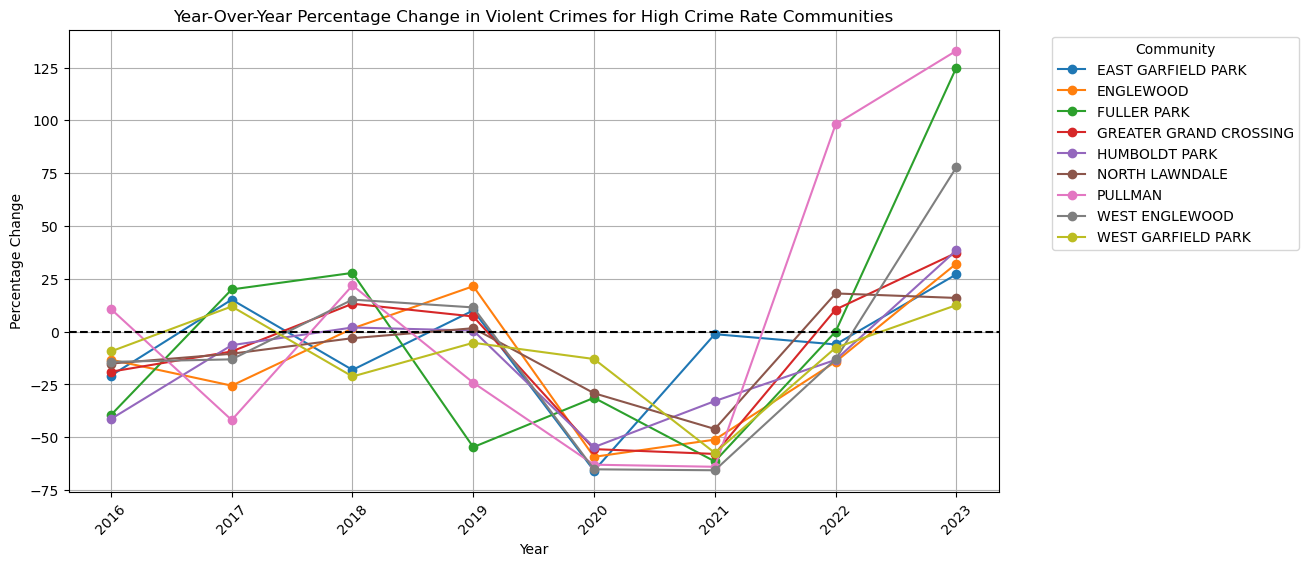

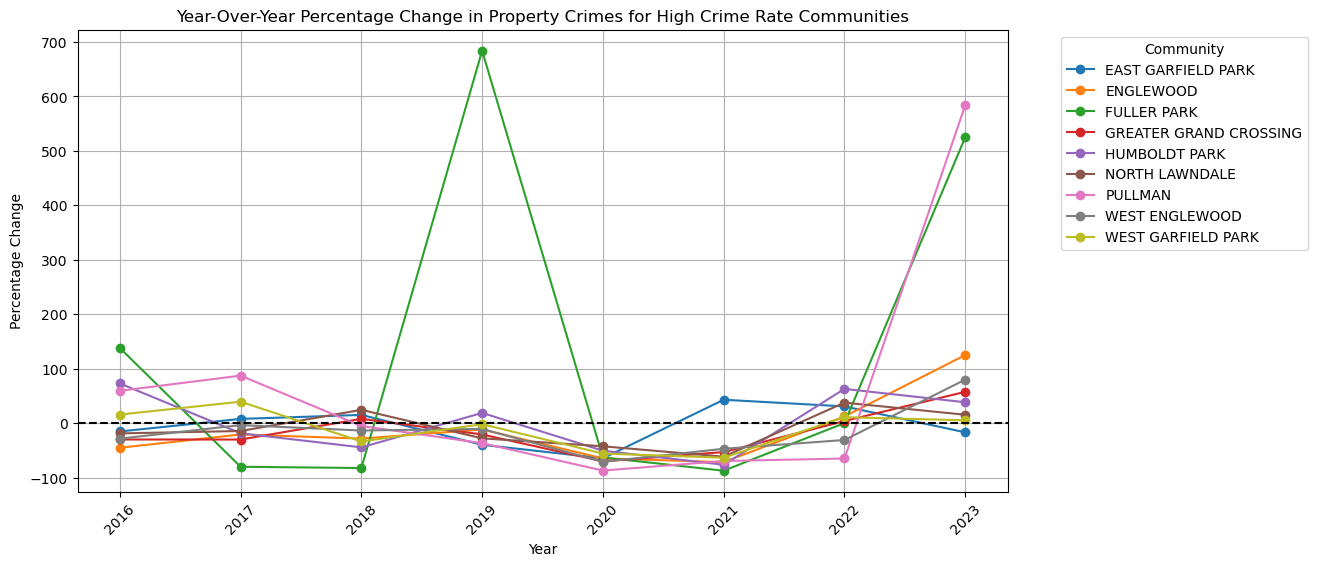

In [22]:
plt.figure(figsize=(12, 6))
for community in high_crime_violent_changes.index:
    plt.plot(high_crime_violent_changes.columns, high_crime_violent_changes.loc[community], marker='o', label=community)
plt.title('Year-Over-Year Percentage Change in Violent Crimes for High Crime Rate Communities')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend(title='Community', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
for community in high_crime_property_changes.index:
    plt.plot(high_crime_property_changes.columns, high_crime_property_changes.loc[community], marker='o', label=community)
plt.title('Year-Over-Year Percentage Change in Property Crimes for High Crime Rate Communities')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend(title='Community', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid(True)
plt.show()


- For violent crimes, from 2021 onwards, there is a noticeable increase in the percentage change for several high-crime communities, suggesting a recent rise in violent crimes.
- Mostly all communities show a significant increase in crime rates from 2021 to 2023, with some communities experiencing over 100% increase year-over-year.


### High Crime Rate Communities: Year-over-year property crime rate changes

### Comparing crime rates across multiple communities and year

In [35]:
# filter the DataFrame to include only Violent and Property Crimes
violent_crimes = crime_df[crime_df['crime_category'] == 'Violent Crimes']
property_crimes = crime_df[crime_df['crime_category'] == 'Property Crimes']

# group by community and year, then sum up incidents
violent_crime_counts = violent_crimes.groupby(['community', 'year']).size().reset_index(name='crime_count')
property_crime_counts = property_crimes.groupby(['community', 'year']).size().reset_index(name='crime_count')

# pivot the DataFrames to have years as columns and communities as rows
pivot_violent = violent_crime_counts.pivot(index='community', columns='year', values='crime_count')
pivot_property = property_crime_counts.pivot(index='community', columns='year', values='crime_count')


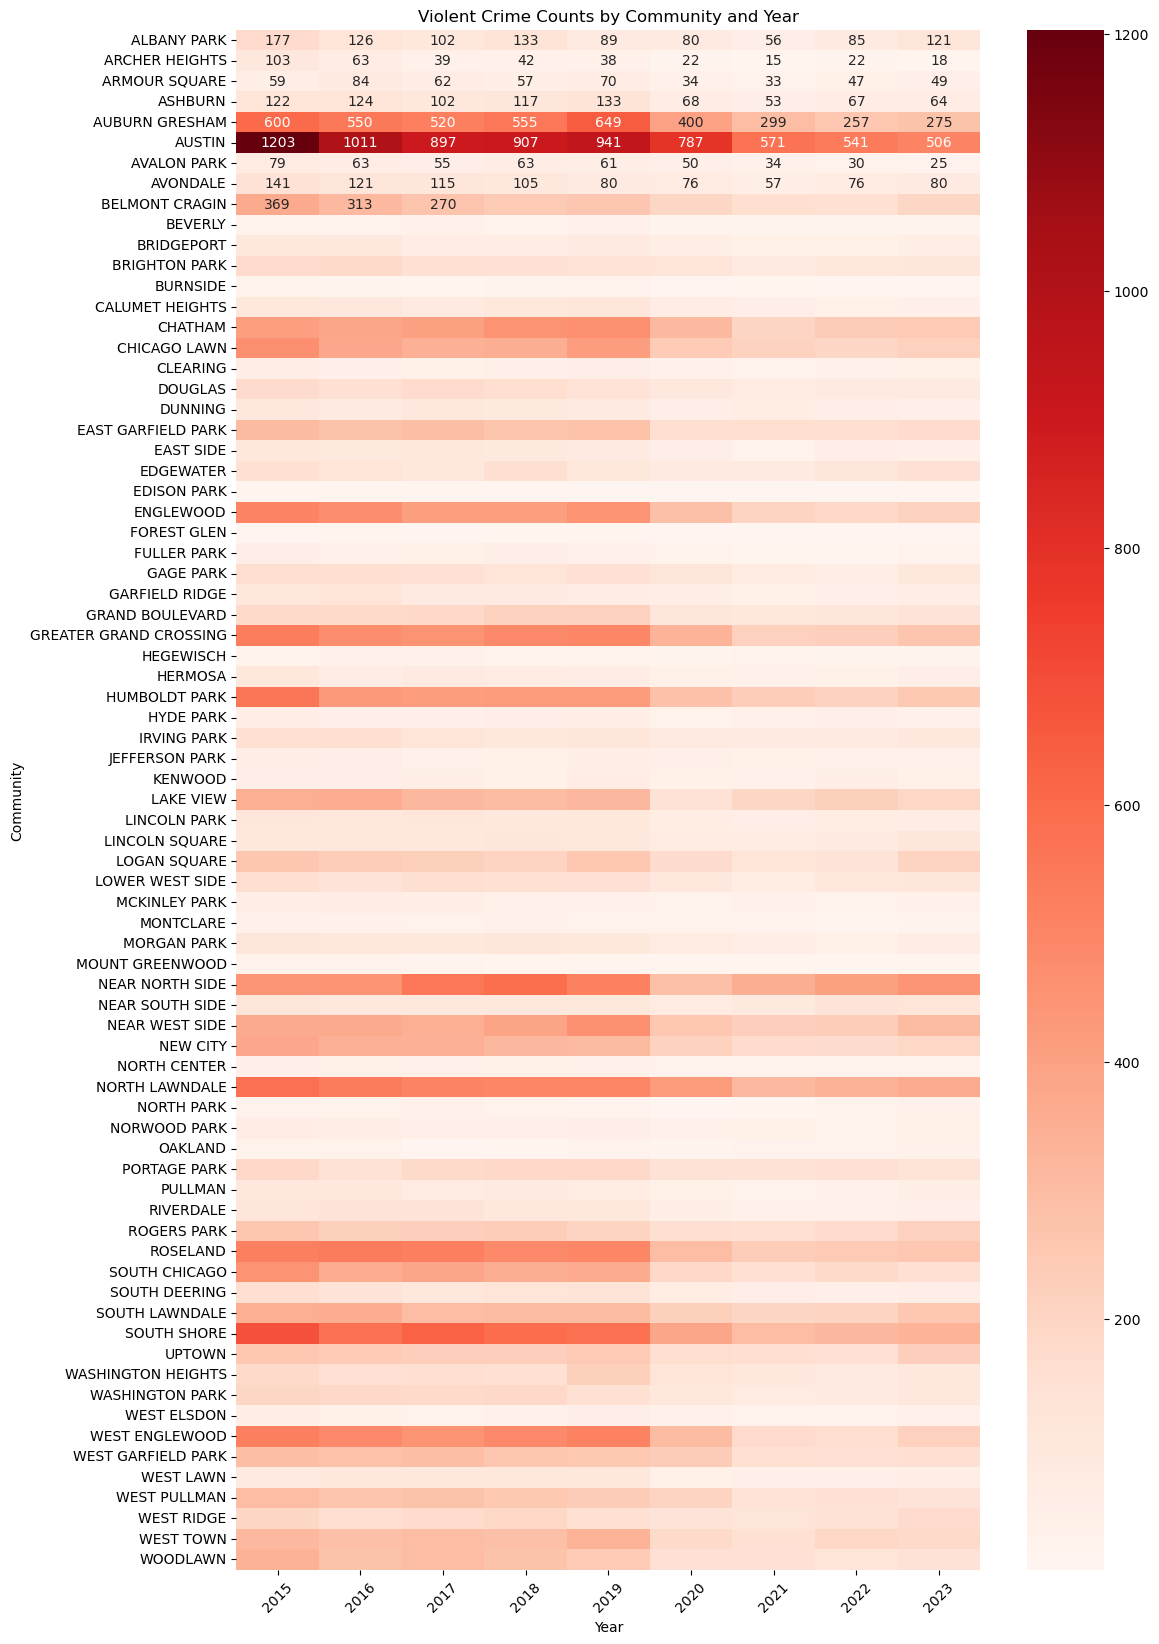

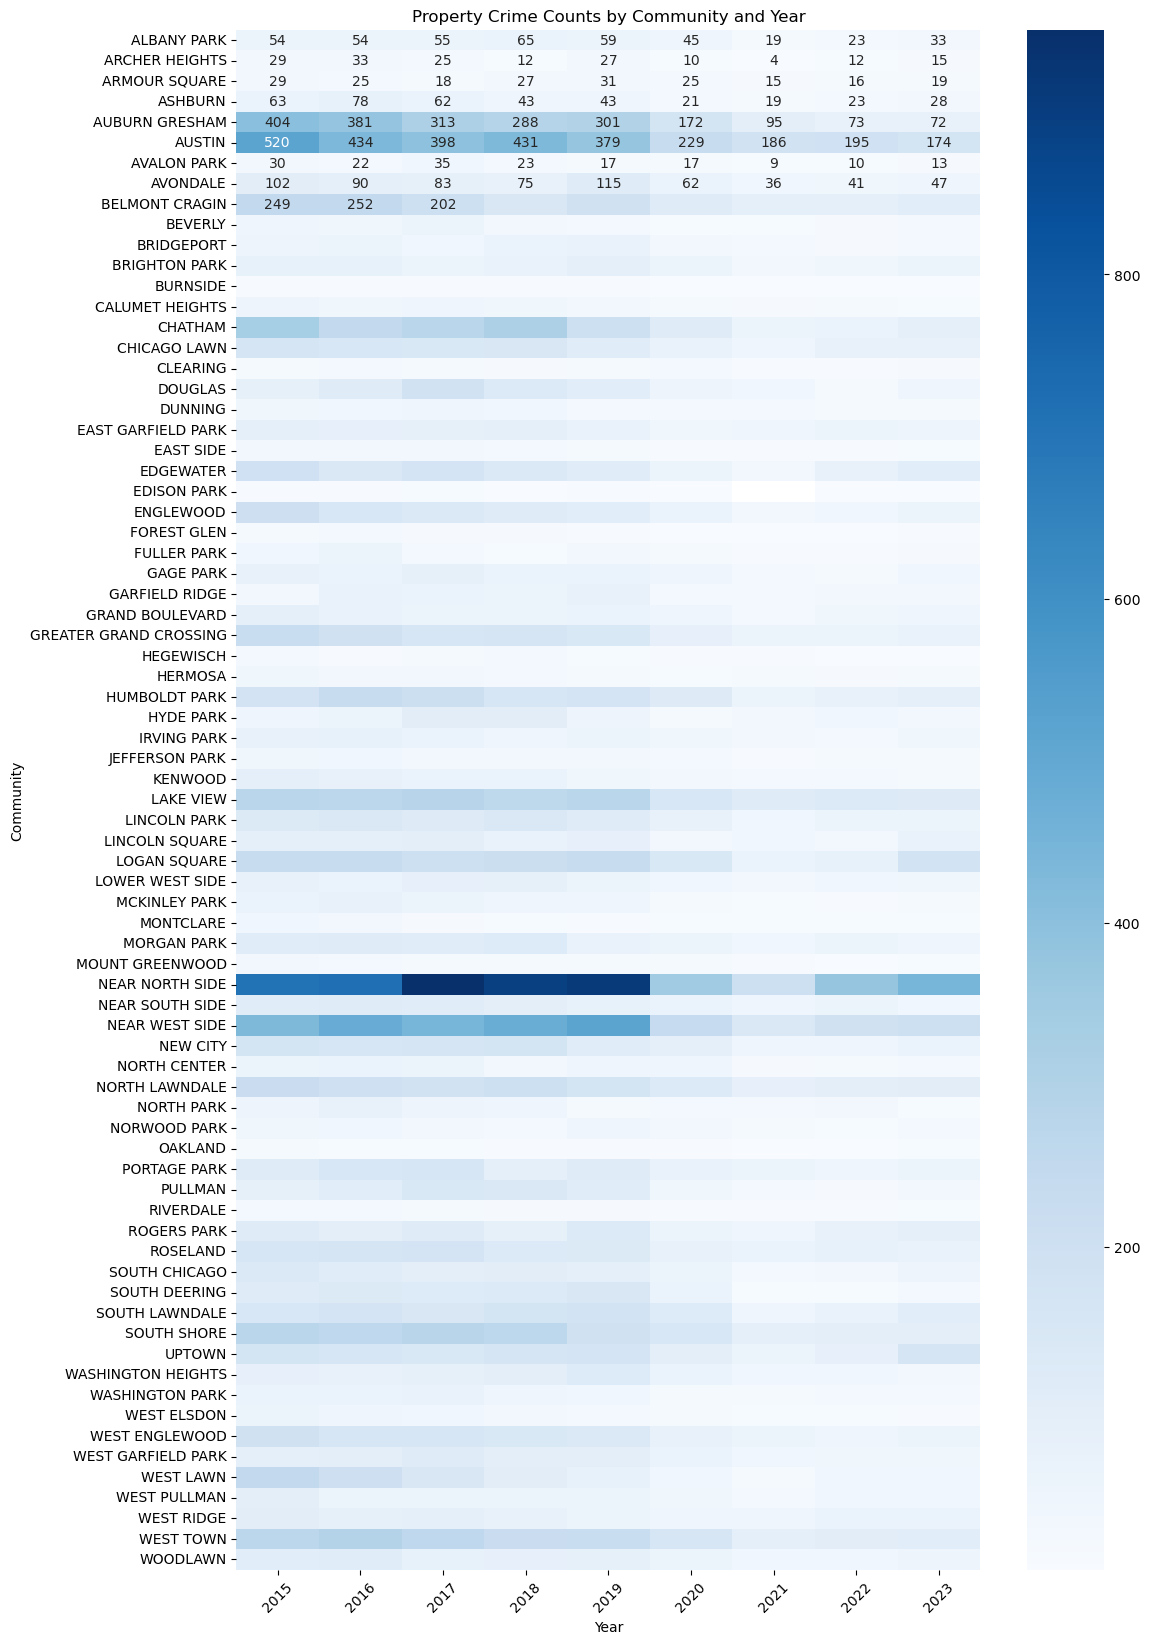

In [36]:
plt.figure(figsize=(12, 20))  
sns.heatmap(pivot_violent, annot=True, cmap='Reds', fmt="g")
plt.title('Violent Crime Counts by Community and Year')
plt.xlabel('Year')
plt.ylabel('Community')
plt.xticks(rotation=45)
plt.savefig('sample_plot6.png')
plt.show()

plt.figure(figsize=(12, 20))
sns.heatmap(pivot_property, annot=True, cmap='Blues', fmt="g")
plt.title('Property Crime Counts by Community and Year')
plt.xlabel('Year')
plt.ylabel('Community')
plt.xticks(rotation=45)
plt.show()


### Percentage change in crime rate per 1000 population per year for each Neighborhood

In [37]:
# calculate the mean crime rate per 1000 population for each community per year
community_yearly_rates = crime_df.groupby(['Neighborhood', 'year'])['Crime_Rate_per_1000'].mean().reset_index()

pivot_table = community_yearly_rates.pivot(index='Neighborhood', columns='year', values='Crime_Rate_per_1000')

percentage_change = pivot_table.pct_change(axis='columns') * 100

melted_percentage_change = pd.melt(percentage_change.reset_index(), id_vars='Neighborhood', var_name='Year', value_name='Percentage Change')

melted_percentage_change['Year'] = melted_percentage_change['Year'].astype(str)

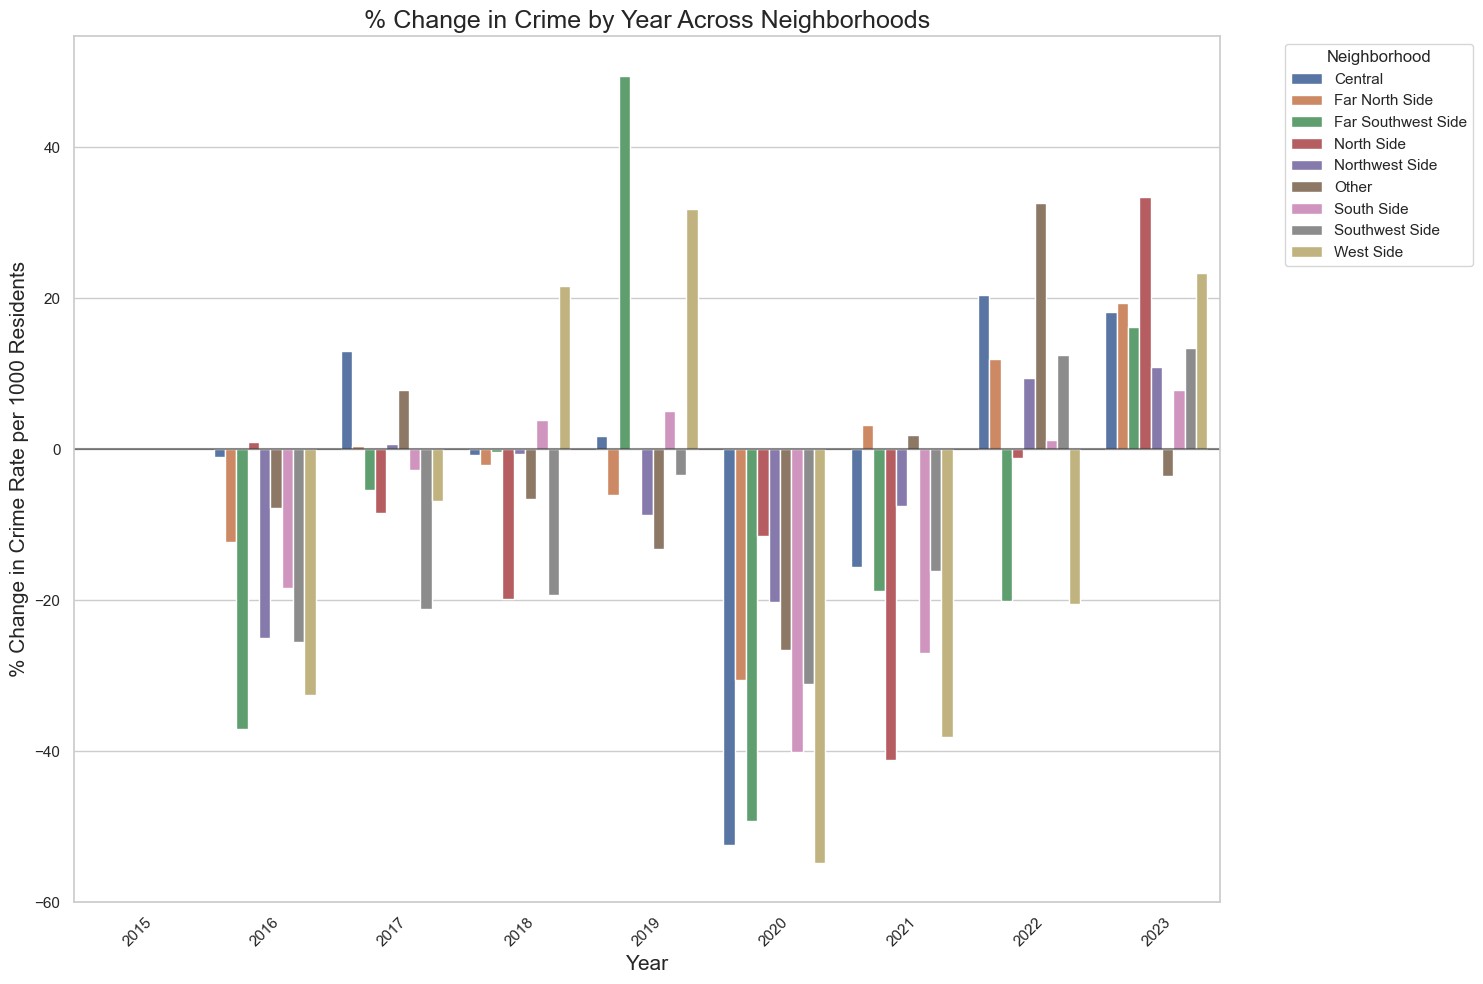

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='Year', y='Percentage Change', hue='Neighborhood', data=melted_percentage_change)

ax.set_title("% Change in Crime by Year Across Neighborhoods", fontsize=18)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("% Change in Crime Rate per 1000 Residents", fontsize=15)

plt.xticks(rotation=45)

ax.axhline(0, color="k", alpha=0.5)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  

plt.show()


### Change in crime rate per 1000 population per year for each Neighborhood

In [39]:
pivot_table = community_yearly_rates.pivot(index='Neighborhood', columns='year', values='Crime_Rate_per_1000')

actual_change = pivot_table.diff(axis='columns')

melted_actual_change = pd.melt(actual_change.reset_index(), id_vars='Neighborhood', var_name='Year', value_name='Actual Change in Crime Rate')


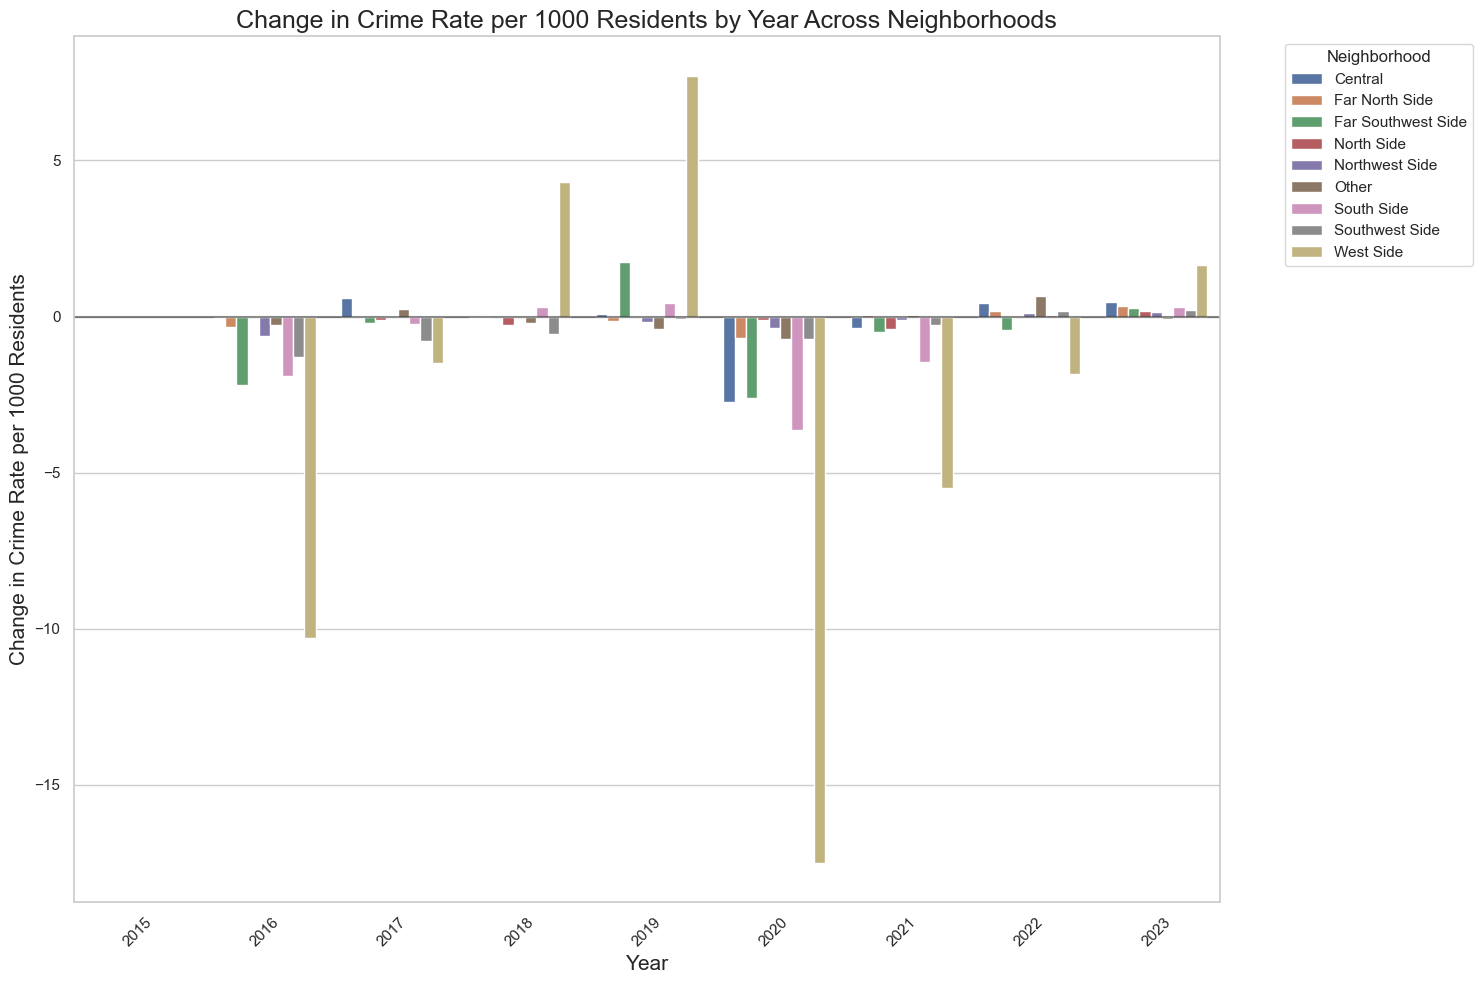

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='Year', y='Actual Change in Crime Rate', hue='Neighborhood', data=melted_actual_change)

ax.set_title("Change in Crime Rate per 1000 Residents by Year Across Neighborhoods", fontsize=18)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Change in Crime Rate per 1000 Residents", fontsize=15)

plt.xticks(rotation=45)

ax.axhline(0, color="k", alpha=0.5)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  

plt.show()


### Socio-economic Determinants of Crime 

C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


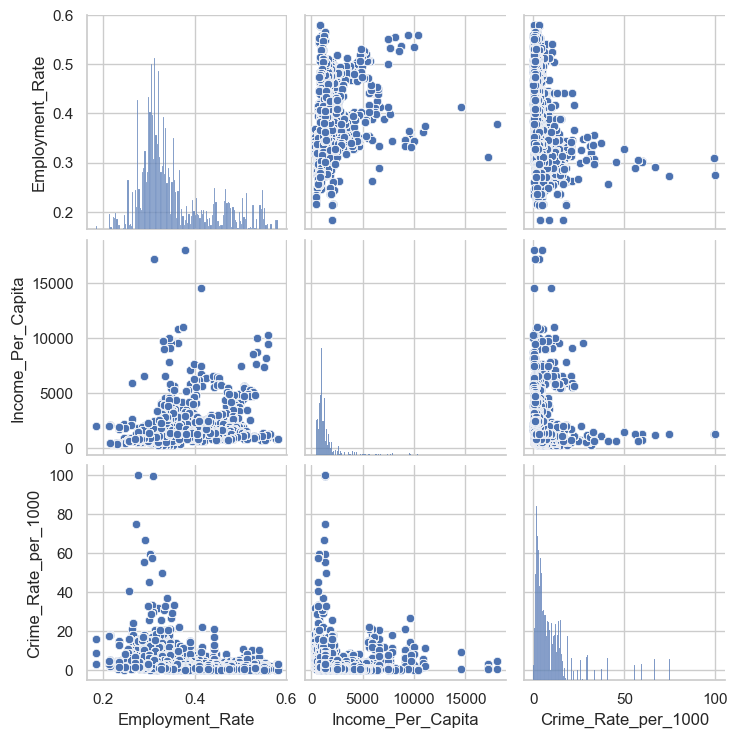

In [43]:
sns.pairplot(crime_df[['Employment_Rate', 'Income_Per_Capita', 'Crime_Rate_per_1000']])
plt.show()


-   **Employment Rate and Crime Rate**: The scatter plot indicates that while higher employment rates generally correlate with lower crime rates, this relationship is not strictly linear. For instance, communities with very low employment rates exhibit a wide range of crime rates, suggesting other factors at play.
-   **Income per Capita and Crime Rate**: Similarly, the relationship between income per capita and crime rate shows a steep decline in crime rates as income increases up to a certain point, after which the decline becomes less pronounced. This suggests a diminishing marginal effect of income on crime reduction.

-   **Threshold Effects**: Certain economic thresholds might need to be crossed before significant reductions in crime rates are observed. For instance, very low-income communities might experience high crime rates until they reach a level of economic stability.

-   **Complex Interactions**: Crime rates are influenced by a myriad of factors, including education, social services, policing, community cohesion, and housing conditions. These factors might interact in complex ways with economic indicators.

-   **Diminishing Returns**: The initial increase in income or employment might lead to substantial crime reductions, but further increases might yield smaller improvements, indicating diminishing returns.


# Property Analysis

In [26]:
crime_df.head(2)

,date,latitude,description,location_description,year,domestic,fbi_code,longitude,primary_type,arrest,geometry,community,shape_area,Neighborhood,crime_category,incident_count_x,TOT_POP,MEDINC,TOT_EMP_RES,Crime_Rate_per_1000,incident_count_y,total_crimes,proportion,Income_Per_Capita,Employment_Rate,shape_area_sq_miles,Month,Day_of_Week,Season
0,2023-12-31 20:02:00,41.891926,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,SIDEWALK,2023,False,18,-87.628074,NARCOTICS,True,POINT (-87.628074136 41.891926214),NEAR NORTH SIDE,7.667590e+07,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0,1.77656,175,1065,0.164319,1165.323007,0.529131,2.750369,12,Sunday,Winter
1,2023-12-29 02:57:00,41.896823,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,2023,False,18,-87.638683,NARCOTICS,True,POINT (-87.638683107 41.89682348),NEAR NORTH SIDE,7.667590e+07,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0,1.77656,175,1065,0.164319,1165.323007,0.529131,2.750369,12,Friday,Winter


### Percent change in median housing pricess by neighborhood

In [44]:
price_pivot = property_df.pivot_table(values='sold_price', index='Neighborhood', columns='year', aggfunc='median')

percentage_change_yearly = price_pivot.pct_change(axis='columns') * 100

percentage_change_yearly = percentage_change_yearly.reset_index()

percentage_change_melted = pd.melt(percentage_change_yearly, id_vars=['Neighborhood'], var_name='Year', value_name='Percentage Change in Sold Price')

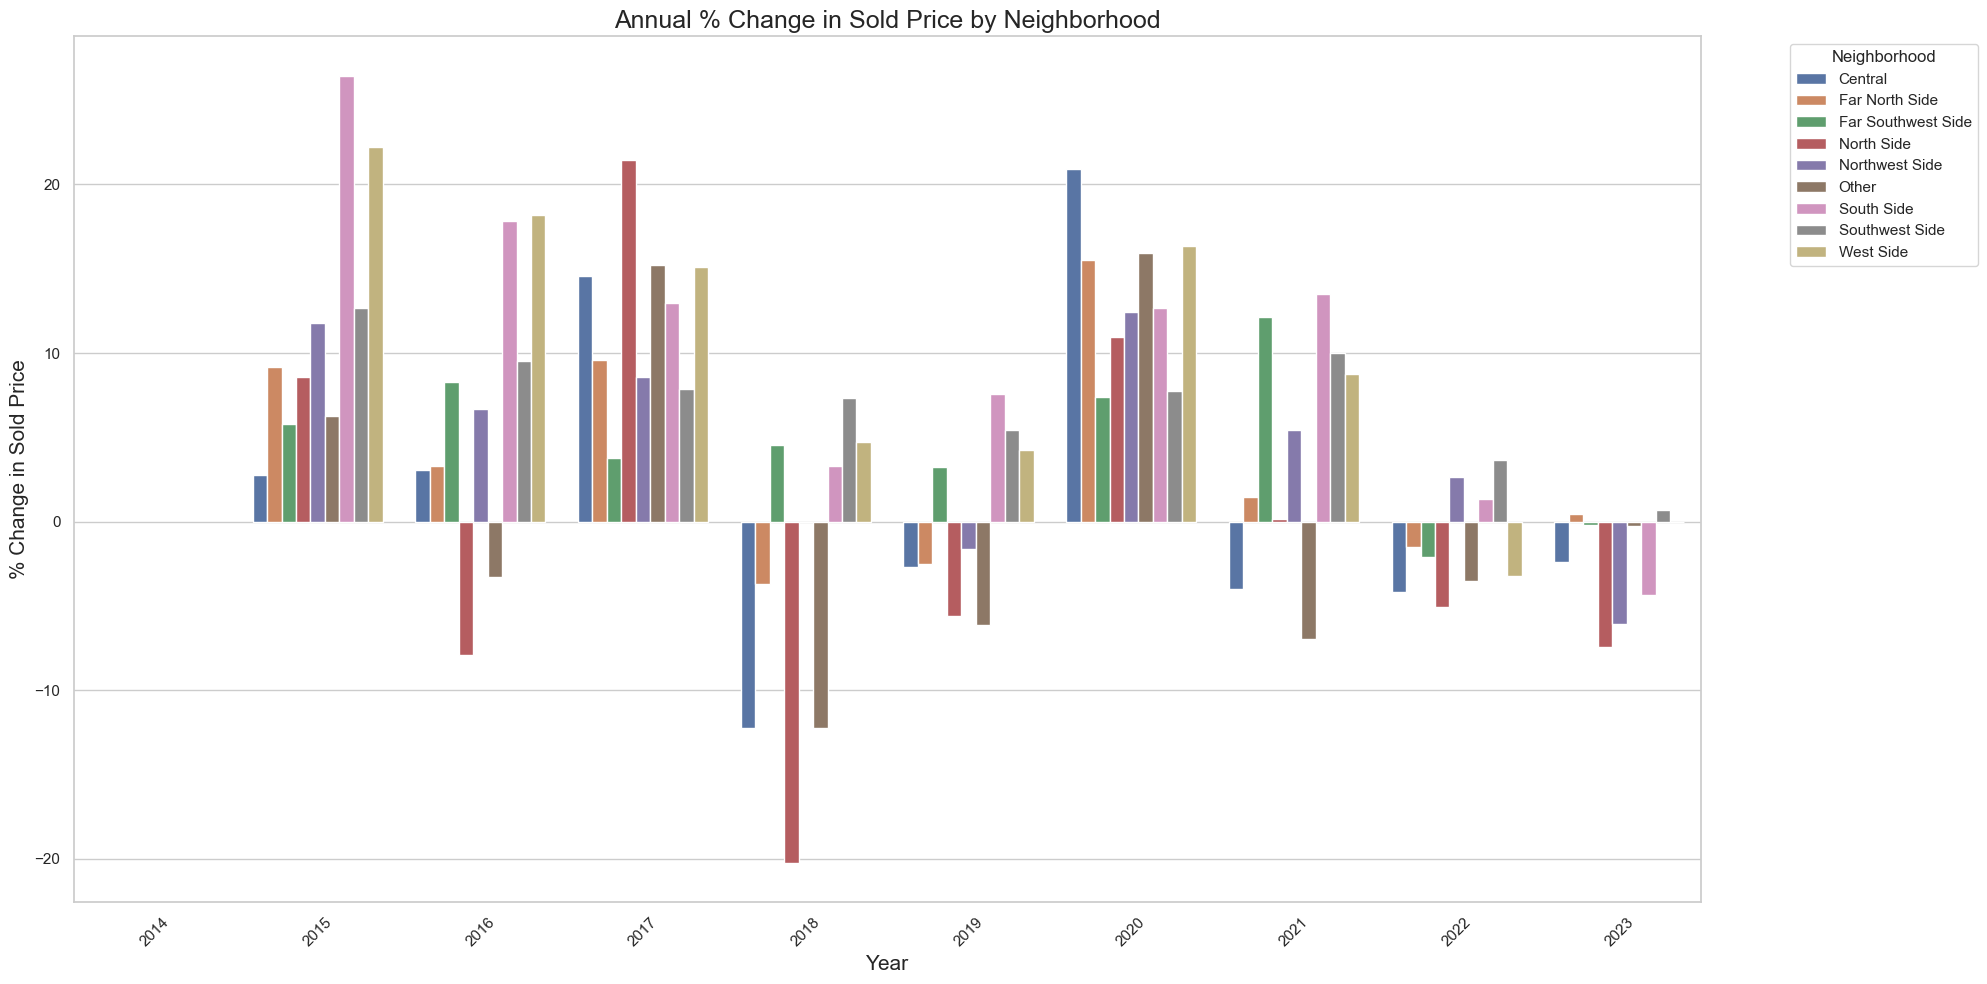

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Year', y='Percentage Change in Sold Price', hue='Neighborhood', data=percentage_change_melted)
ax.set_title("Annual % Change in Sold Price by Neighborhood", fontsize=18)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("% Change in Sold Price", fontsize=15)
plt.xticks(rotation=45)  
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() 
plt.savefig('sample_plot1.png')

plt.show()


### Change In Median Housing Prices by Neighborhood

In [46]:
price_pivot_median = property_df.pivot_table(values='sold_price', index='Neighborhood', columns='year', aggfunc='median')

change_median_yearly = price_pivot_median.diff(axis='columns')


In [47]:
change_median_melted = pd.melt(change_median_yearly.reset_index(), id_vars=['Neighborhood'], var_name='Year', value_name='Change in Median Sold Price')


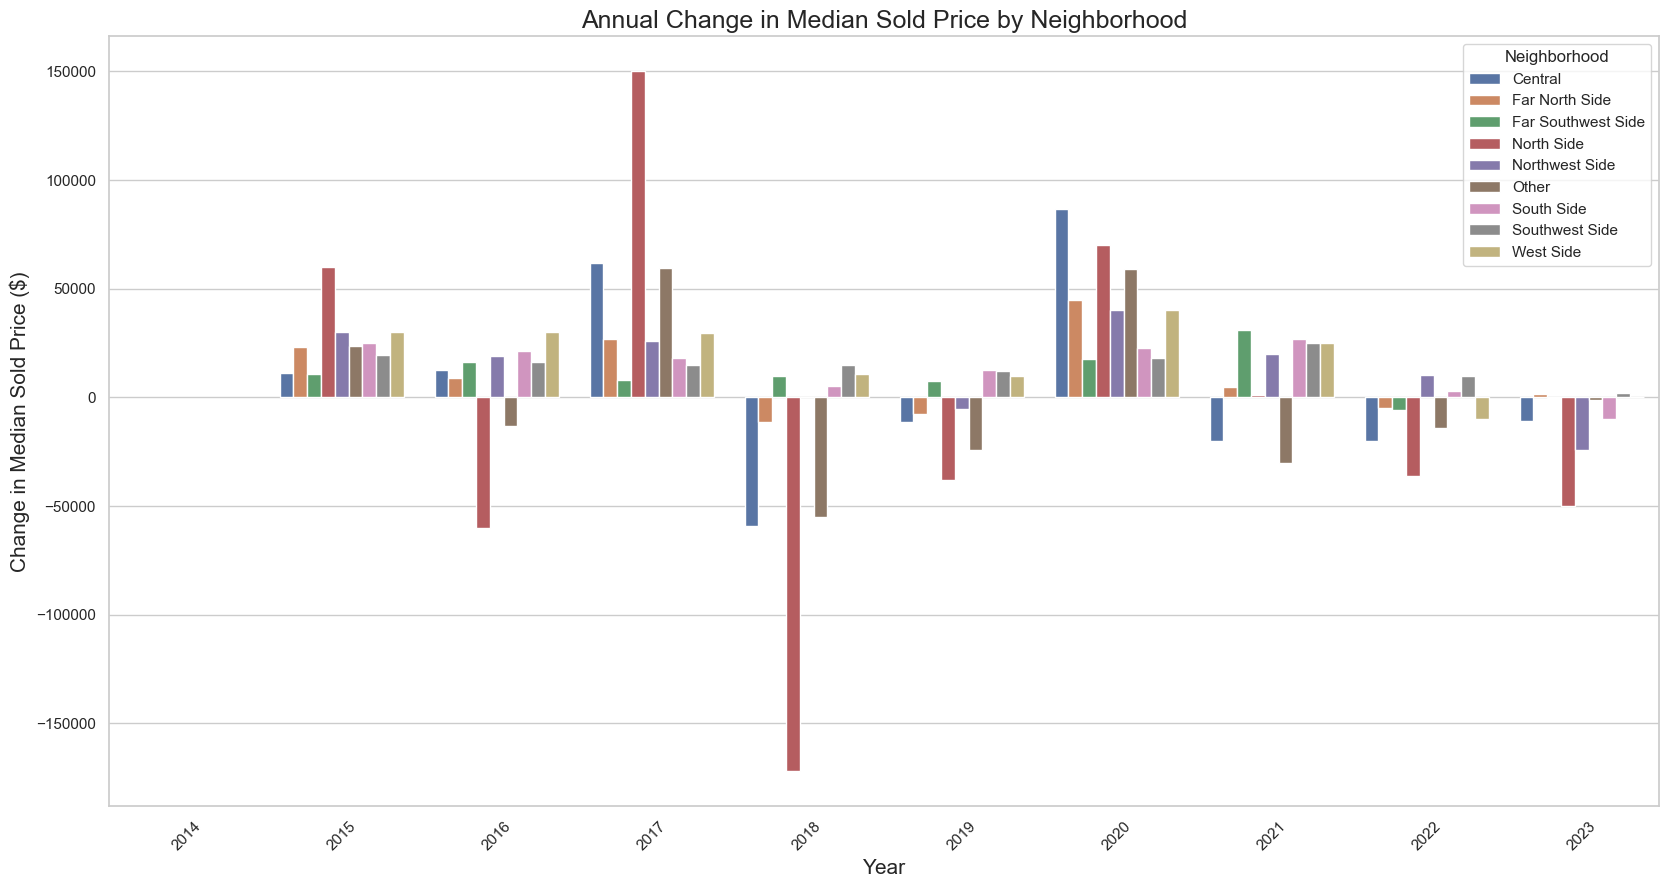

In [48]:
sns.set(style="whitegrid")

plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Year', y='Change in Median Sold Price', hue='Neighborhood', data=change_median_melted)
ax.set_title("Annual Change in Median Sold Price by Neighborhood", fontsize=18)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Change in Median Sold Price ($)", fontsize=15)
plt.xticks(rotation=45)  # Rotate
plt.savefig('sample_plot12png')


**Market Stability**: The relative stabilization of price changes in recent years suggests a maturing market, potentially driven by a balance between supply and demand.


### Neighborhood Yearly Average and Median Price Trends 

In [51]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'], errors='coerce')

property_df['sale_year'] = property_df['last_sold_date'].dt.year

grouped_df = property_df.groupby(['Neighborhood', 'sale_year'])

stats_df = grouped_df['sold_price'].agg(['mean', 'median', lambda x: x.max() - x.min()])
stats_df.rename(columns={'mean': 'Average Sold Price', 'median': 'Median Sold Price', '<lambda_0>': 'Range of Sold Prices'}, inplace=True)

stats_df['Average Sold Price'] = stats_df['Average Sold Price'].apply(lambda x: f"${x:,.2f}")
stats_df['Median Sold Price'] = stats_df['Median Sold Price'].apply(lambda x: f"${x:,.2f}")
stats_df['Range of Sold Prices'] = stats_df['Range of Sold Prices'].apply(lambda x: f"${x:,.2f}")

stats_df.head(60)


Average Sold Price Median Sold Price  \
Neighborhood       sale_year                                        
Central            2014             $545,963.55       $399,000.00   
                   2015             $566,975.01       $410,000.00   
                   2016             $567,506.57       $422,625.00   
                   2017             $635,324.51       $484,250.00   
                   2018             $560,347.63       $425,000.00   
                   2019             $547,107.89       $413,500.00   
                   2020             $619,283.38       $500,000.00   
                   2021             $617,712.72       $480,000.00   
                   2022             $597,234.43       $460,000.00   
                   2023             $580,248.27       $449,000.00   
Far North Side     2014             $266,452.89       $250,000.00   
                   2015             $293,762.05       $273,000.00   
                   2016             $306,164.59       $282,000.00   
                   2017             $328,490.48       $309,000.00   
                   2018             $318,390.47       $297,500.00   
                   2019             $313,747.99       $290,000.00   
                   2020             $351,014.75       $335,000.00   
                   2021             $354,723.79       $340,000.00   
                   2022             $361,178.94       $335,000.00   
                   2023             $355,594.28       $336,600.00   
Far Southwest Side 2014             $200,603.03       $185,000.00   
                   2015             $214,128.34       $195,750.00   
                   2016             $229,262.27       $212,000.00   
                   2017             $231,226.46       $220,000.00   
                   2018             $268,214.77       $230,000.00   
                   2019             $256,068.03       $237,450.00   
                   2020             $275,133.63       $255,000.00   
                   2021             $306,773.70       $286,000.00   
                   2022             $308,216.88       $280,000.00   
                   2023             $293,520.82       $279,500.00   
North Side         2014             $766,080.90       $700,000.00   
                   2015             $850,908.51       $760,000.00   
                   2016             $809,439.28       $700,000.00   
                   2017             $906,662.28       $850,000.00   
                   2018             $771,617.97       $678,000.00   
                   2019             $758,988.41       $640,000.00   
                   2020             $822,442.06       $710,000.00   
                   2021             $823,165.49       $711,000.00   
                   2022             $812,926.67       $675,000.00   
                   2023             $814,361.44       $625,000.00   
Northwest Side     2014             $270,564.74       $255,000.00   
                   2015             $306,097.16       $285,000.00   
                   2016             $329,030.68       $304,000.00   
                   2017             $353,255.11       $330,000.00   
                   2018             $358,941.18       $330,000.00   
                   2019             $347,947.53       $324,700.00   
                   2020             $388,167.26       $365,000.00   
                   2021             $402,790.66       $384,900.00   
                   2022             $423,264.43       $395,000.00   
                   2023             $401,617.88       $371,000.00   
Other              2014             $466,745.43       $380,000.00   
                   2015             $472,764.33       $403,800.00   
                   2016             $463,384.79       $390,500.00   
                   2017             $547,312.02       $450,000.00   
                   2018             $506,849.42       $395,000.00   
                   2019             $457,165.40       $370,875.00   
                   2020    

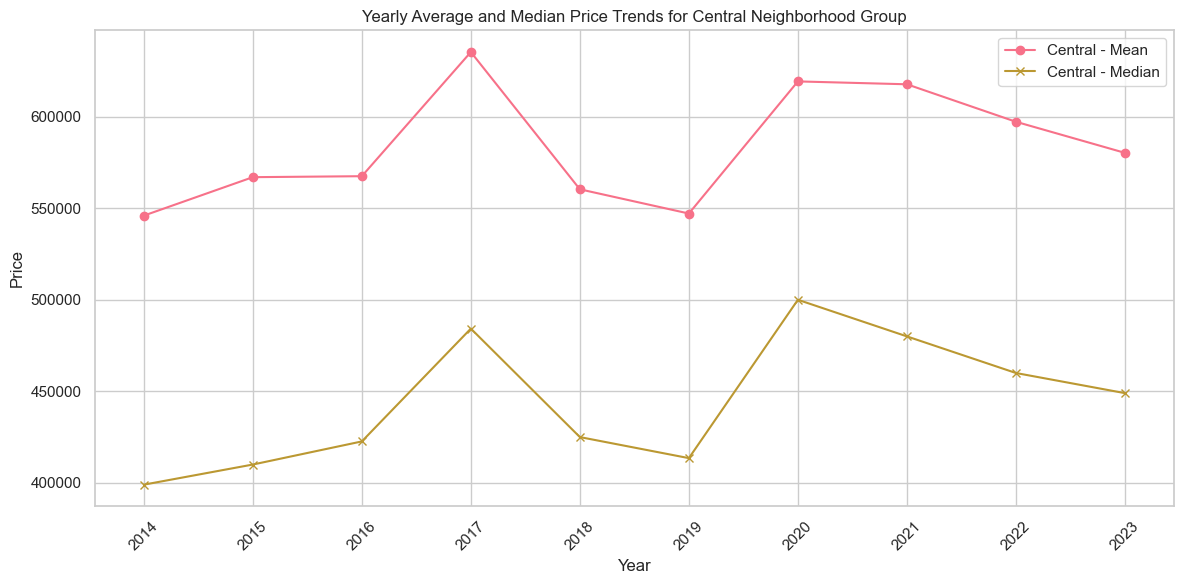

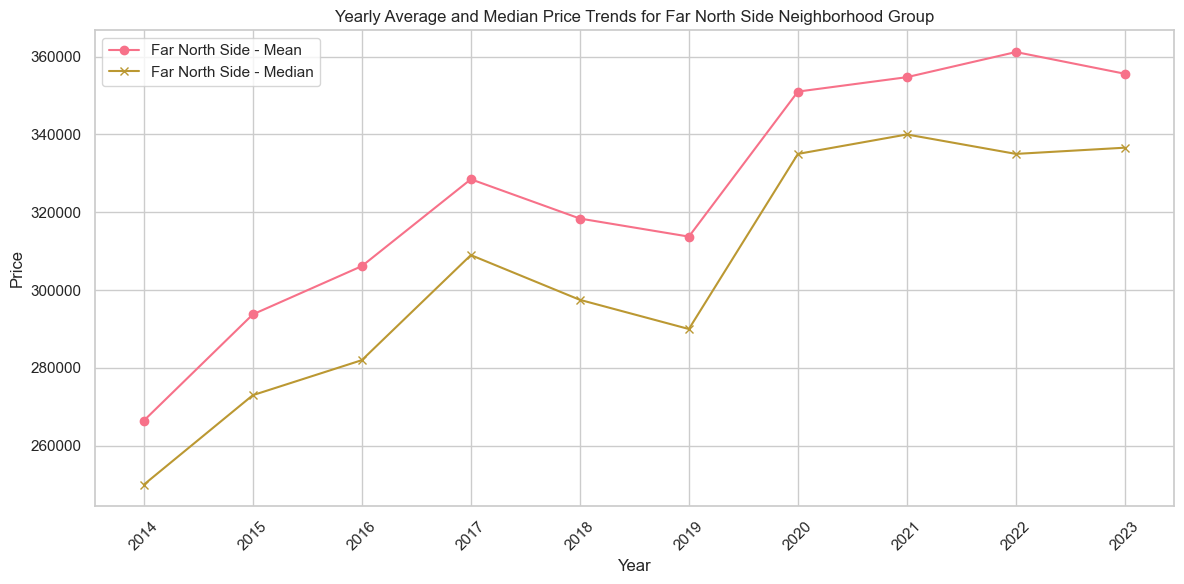

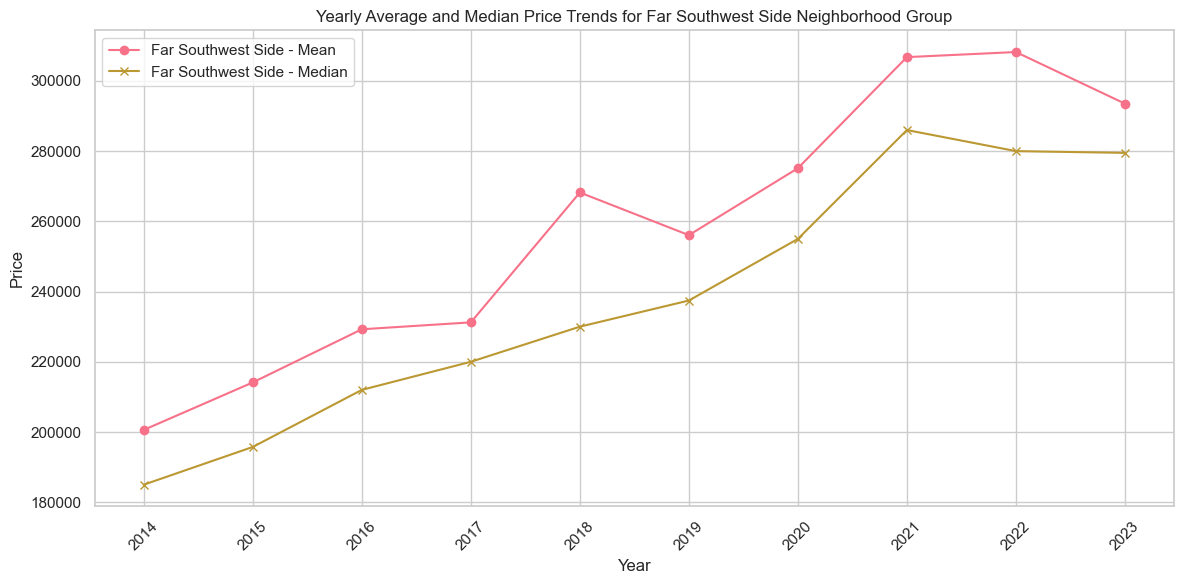

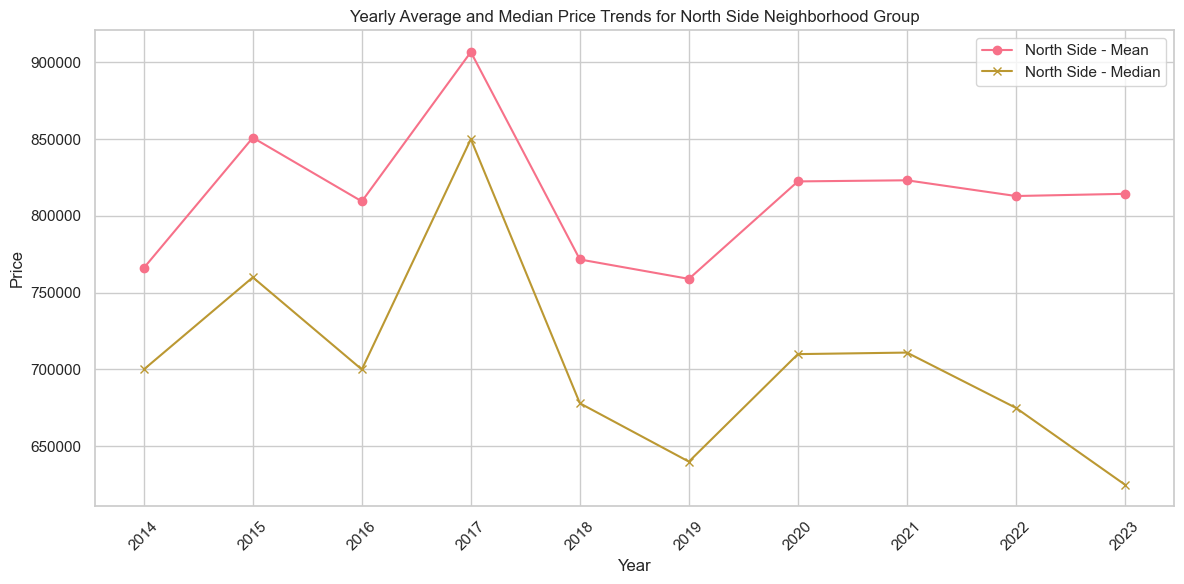

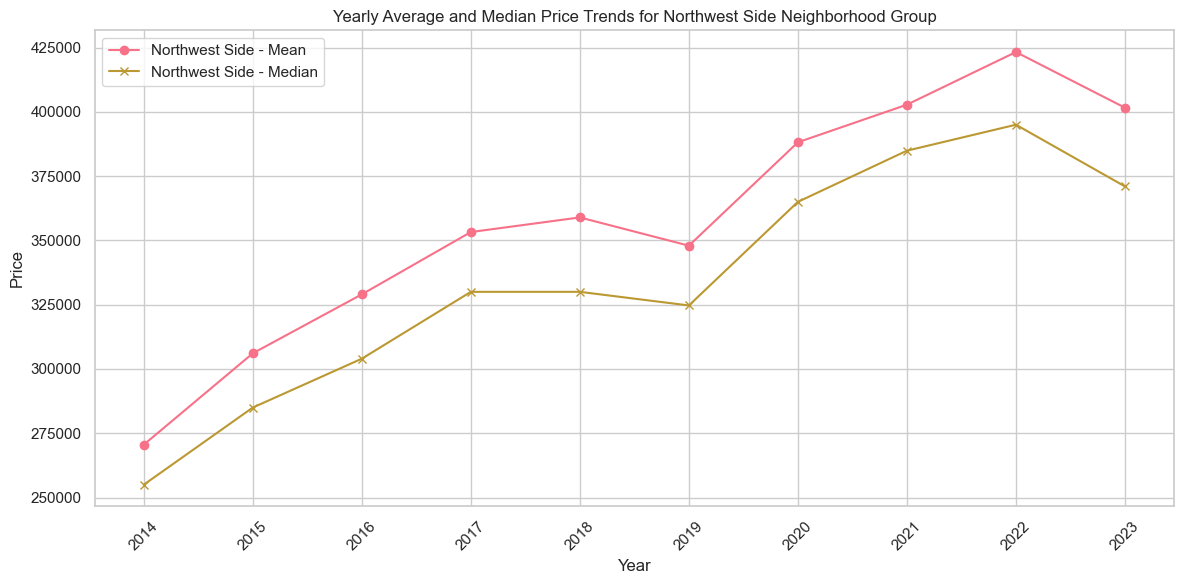

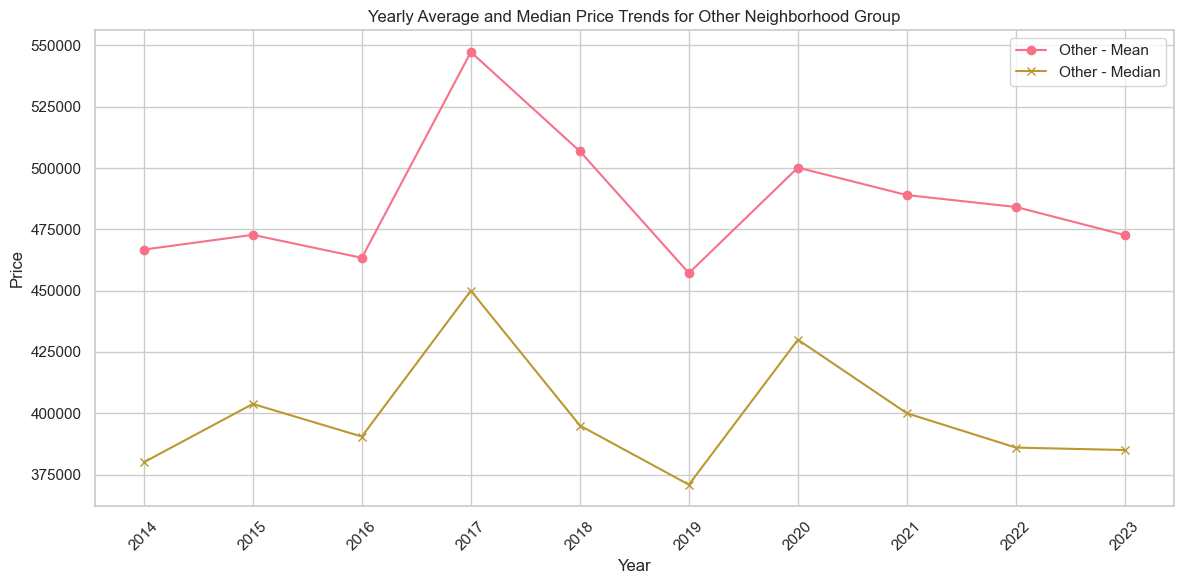

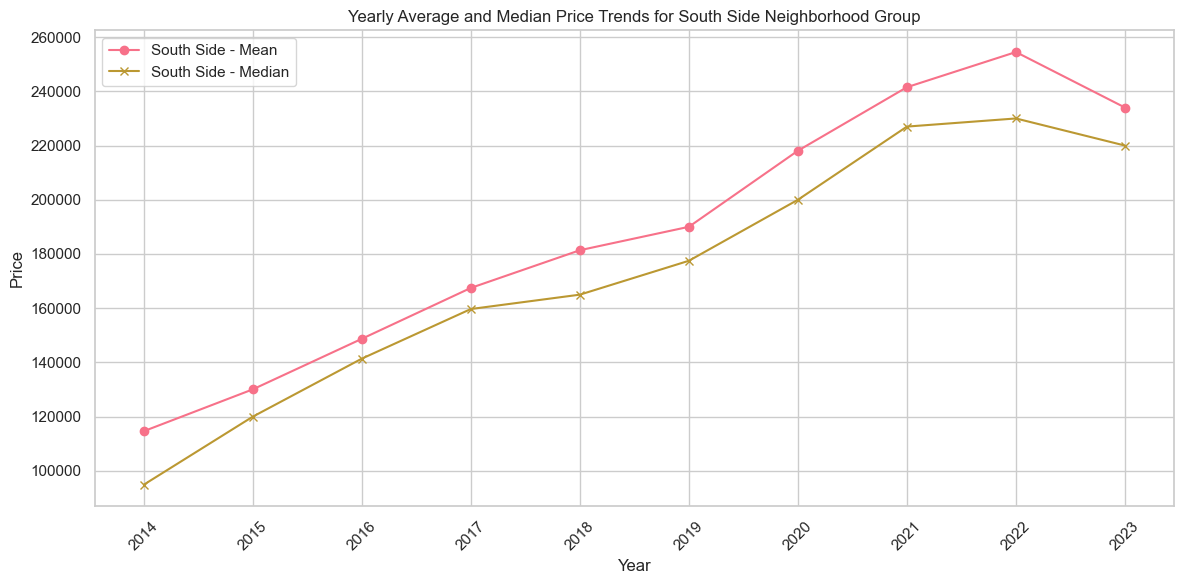

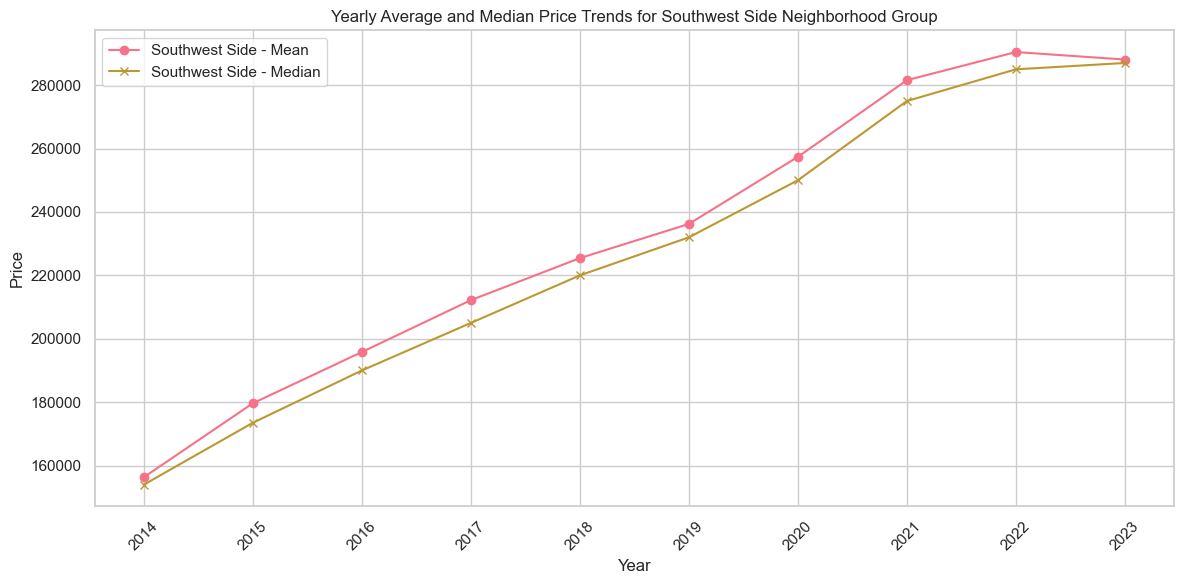

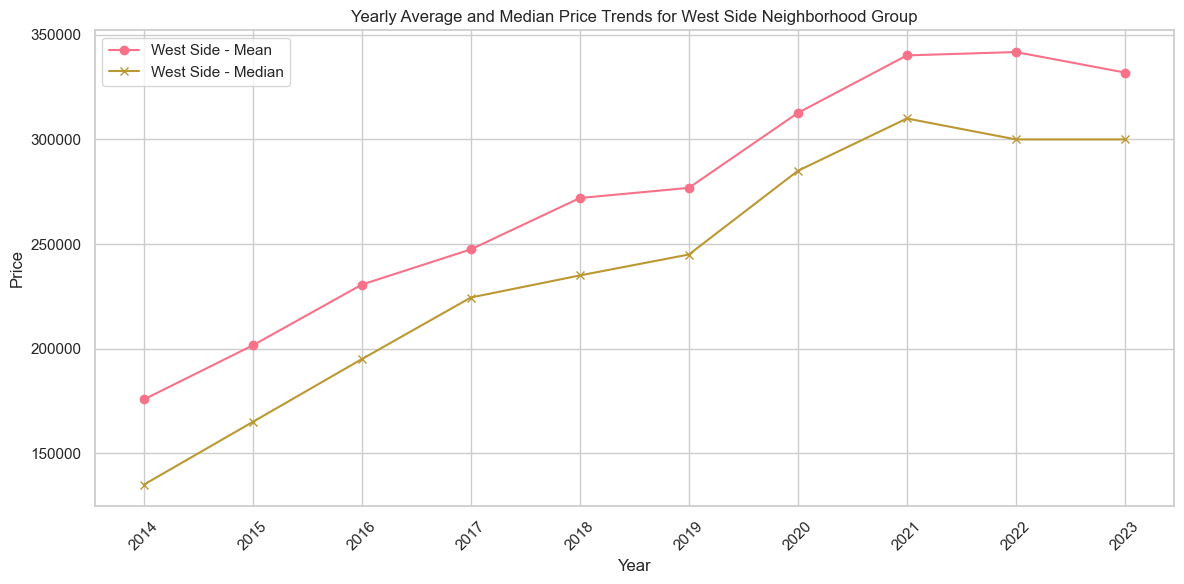

In [54]:
grouped_data = property_df.groupby(['Neighborhood', 'sale_year'])['sold_price'].agg(['mean', 'median']).reset_index()

neighborhood_groups = grouped_data['Neighborhood'].unique()

for group in neighborhood_groups:
    group_data = grouped_data[grouped_data['Neighborhood'] == group]
    plt.figure(figsize=(12, 6))
    sns.set_palette("husl")  

    plt.plot(group_data['sale_year'], group_data['mean'], label=f'{group} - Mean', marker='o')
    
    plt.plot(group_data['sale_year'], group_data['median'], label=f'{group} - Median', marker='x')
    
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title(f'Yearly Average and Median Price Trends for {group} Neighborhood Group')
    plt.xticks(group_data['sale_year'].unique(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('sample_plot3.png')
    plt.show()

### Key Findings

-   There is a stark contrast between the highest and lowest crime rate communities. The bottom five communities have such low crime rates that their bars are barely visible on the same scale as the top five, highlighting a significant disparity across different areas.

-   There appears to be an inverse relationship between crime rates and property values in Chicago. Communities with higher crime rates tend to have lower median sold prices, whereas those with lower crime rates exhibit higher median sold prices.

-   Some communities have become safer, while others have seen rising crime rates. Understanding the factors driving these changes is crucial for informed policy-making and community safety initiatives.

-   The relationship between crime rates and property values is complex. While crime rates are an important factor, other elements also significantly influence property market trends.

-   Most communities show a significant increase in crime rates from 2021 to 2023, with some experiencing over 100% year-over-year increases.

-   Crime rates are influenced by various factors, including education, social services, policing, community cohesion, and housing conditions. These factors interact in complex ways with economic indicators.